In [70]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import pandas as pd
from selenium import webdriver

import warnings
warnings.filterwarnings('ignore')

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

import seaborn as sns
import matplotlib.pyplot as plt


1. 멜론 랭킹

In [26]:
url = 'https://www.melon.com/chart/index.htm'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

result = requests.get(url, headers=header)

if result.status_code != 200:
    print('result.status_code = ', result.status_code)

soup = BeautifulSoup(result.text, 'html.parser')
trs = soup.select(' tbody > tr')

lines = []
for tr in trs:
    rank = tr.select_one('.rank').get_text().strip()
    img = tr.select_one('img')['src']
    title = tr.select_one('.rank01 > span > a').get_text()
    artist = tr.select_one('.rank02 > a').get_text()
    album = tr.select_one('.rank03 > a').get_text()
    lines.append({'순위': rank, '곡명': title, '아티스트': artist, '앨범': album, '이미지': img})

df = pd.DataFrame(lines)     
df.head()

,순위,곡명,아티스트,앨범,이미지
0,1,I AM,IVE (아이브),I've IVE,https://cdnimg.melon.co.kr/cm2/album/images/11...
1,2,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),UNFORGIVEN,https://cdnimg.melon.co.kr/cm2/album/images/11...
2,3,Kitsch,IVE (아이브),I've IVE,https://cdnimg.melon.co.kr/cm2/album/images/11...
3,4,손오공,세븐틴 (SEVENTEEN),SEVENTEEN 10th Mini Album ‘FML',https://cdnimg.melon.co.kr/cm2/album/images/11...
4,5,Spicy,aespa,MY WORLD - The 3rd Mini Album,https://cdnimg.melon.co.kr/cm2/album/images/11...


In [25]:
now = datetime.now()

df.to_csv(f"static/data/멜론_{now.strftime('%Y')[2:]}{now.strftime('%m%d%H')}.csv", index=False)



,순위,곡명,아티스트,앨범,이미지
0,1,I AM,IVE (아이브),I've IVE,https://cdnimg.melon.co.kr/cm2/album/images/11...
1,2,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),UNFORGIVEN,https://cdnimg.melon.co.kr/cm2/album/images/11...
2,3,Kitsch,IVE (아이브),I've IVE,https://cdnimg.melon.co.kr/cm2/album/images/11...
3,4,손오공,세븐틴 (SEVENTEEN),SEVENTEEN 10th Mini Album ‘FML',https://cdnimg.melon.co.kr/cm2/album/images/11...
4,5,Spicy,aespa,MY WORLD - The 3rd Mini Album,https://cdnimg.melon.co.kr/cm2/album/images/11...


2. 유튜브 랭킹 가져오기

In [12]:
import re
def convert_num(s):
    return int(re.sub('[,억개 ]', '', s).replace('만', '0000'))

In [13]:
print(convert_num('8800만'))

88000000


In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("--single-process")
options.add_argument("--disable-dev-shm-usage")
# driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver', options=options)

In [ ]:
# webdrive로

base_url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='
driver = webdriver.Chrome('C:/Users/sujung/Downloads/chromedriver_win32/chromedriver.exe')

lines = []
for i in range(1, 11):
    print('page = ', i)
    driver.get(base_url + str(i))
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    trs = soup.select('.aos-init')

    for tr in trs:
        
        rank = int(tr.select_one('.rank').get_text().strip())
        category = tr.select_one('.category').get_text().strip()[1:-1]
        channel = tr.select_one(' h1 > a').get_text().strip()

        subscriber = convert_num(tr.select_one('.subscriber_cnt').get_text())
        view = convert_num(tr.select_one('.view_cnt').get_text())
        video = convert_num(tr.select_one('.video_cnt').get_text())

        lines.append({'순위':rank, '카테고리':category, '채널': channel, '구독자수': subscriber, '조회수': view, '비디오': video})


df = pd.DataFrame(lines)

driver.close()

df.head()

In [23]:
df.to_csv('static/data/youtubeRank.csv', index=False)

In [24]:
df2 = pd.read_csv('static/data/youtubeRank.csv')
df2.head()

,순위,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,88000000,30959130000,514
1,2,음악/댄스/가수,BANGTANTV,74600000,20279390000,2195
2,3,음악/댄스/가수,HYBE LABELS,70600000,27690310000,1185
3,4,음악/댄스/가수,SMTOWN,31700000,26928580000,4121
4,5,음악/댄스/가수,JYP Entertainment,26900000,19395230000,1678


In [27]:
# 카테로리별 채널 수 top10
df_top10 = df2.pivot_table('채널', '카테고리', aggfunc='count').sort_values('채널', ascending=False).head(10)
df_top10

,채널
카테고리,
미분류,186
음악/댄스/가수,153
키즈/어린이,133
TV/방송,124
음식/요리/레시피,71
BJ/인물/연예인,59
뉴스/정치/사회,58
게임,51
취미/라이프,32


In [46]:
# 구독자수 top 20
df_top20 = df2.head(20)

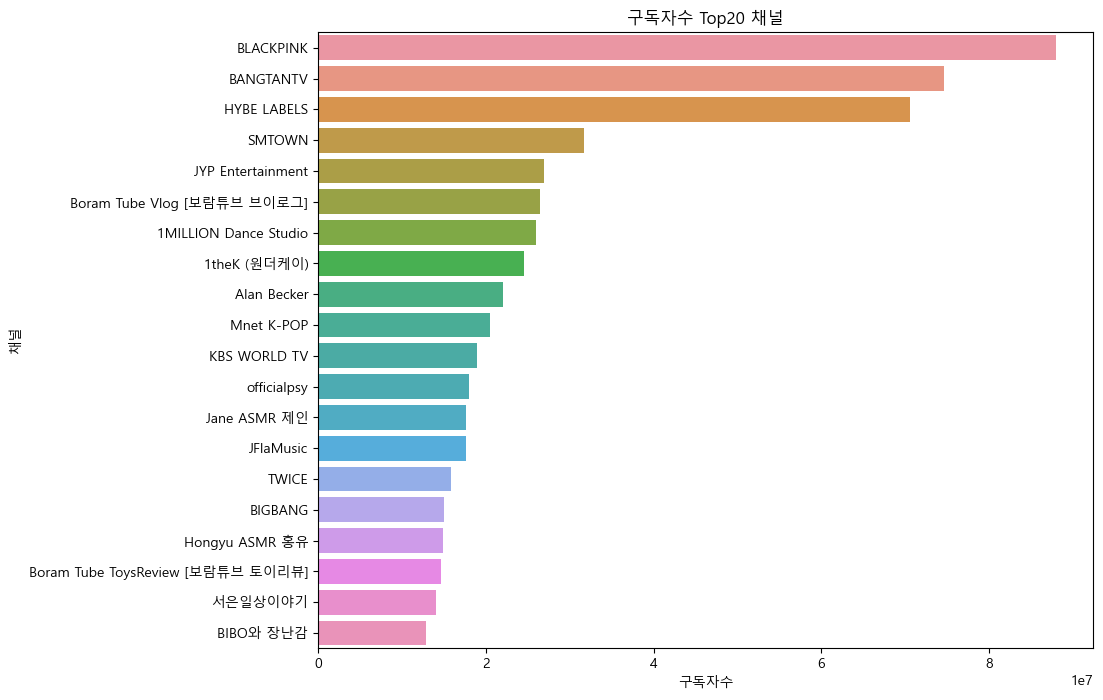

In [83]:
plt.figure(figsize=(10, 8))
sns.set_palette("muted")
splot = sns.barplot(x='구독자수', y='채널', data=df_top20, )
plt.title('구독자수 Top20 채널')
splot.get_figure().savefig('static/data/top20.png', bbox_inches='tight', pad_inches=0.3)
# plt.show()

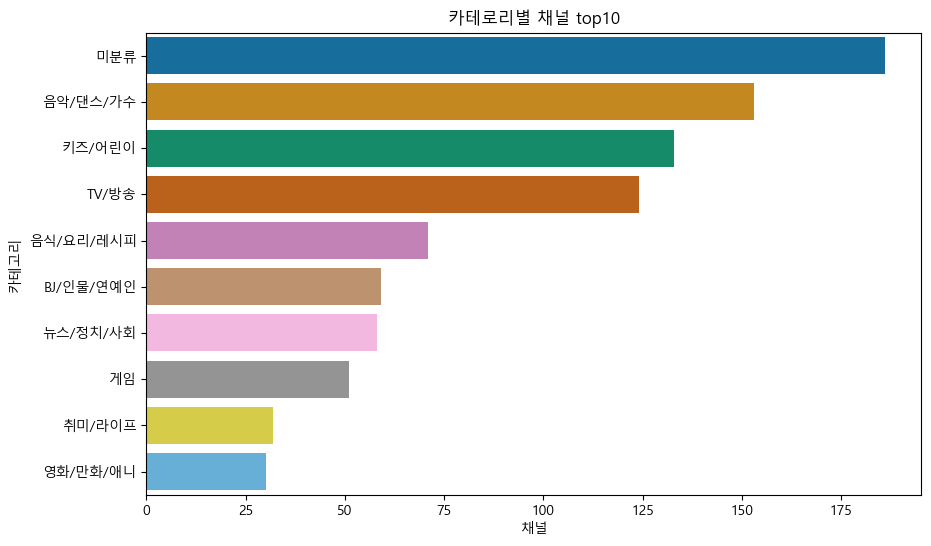

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.set_palette("colorblind")
splot = sns.barplot(x='채널', y=df_top10.index, data=df_top10)
plt.title('카테로리별 채널 top10')
splot.get_figure().savefig('static/data/top10.png', bbox_inches='tight', pad_inches=0.3)
# plt.show()
# plt.savefig('static/data/top10.png')


In [82]:
base_url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver_win32/chromedriver.exe')

lines = []
for i in range(1, 2):
    driver.get(base_url + str(i))
    time.sleep(3)

    trs = driver.find_elements(By.CLASS_NAME, 'aos-init')
    print(len(trs))
    
    for tr in trs[:10]:
        
        rank = tr.find_element(By.CLASS_NAME, 'rank').text.strip()
        print(rank)
       
        # 실패
        # category = tr.find_element(By.CSS_SELECTOR, '.category').text.strip()[1:-1]
        # channel = tr.find_element(By.CSS_SELECTOR, 'td > h1 > a').text.strip()

        # subscriber = convert_num(tr.find_element(By.CSS_SELECTOR, '.subscriber_cnt').text.strip())
        # view = convert_num(tr.find_element(By.CSS_SELECTOR, '.view_cnt').text.strip())
        # video = convert_num(tr.find_element(By.CSS_SELECTOR, '.video_cnt').text.strip())

        # # print(rank, subscriber, view,  video)

        # lines.append({'순위':rank, '카테고리':category, '채널': channel, '구독자수': subscriber, '조회수': view, '비디오': video})


df = pd.DataFrame(lines)

driver.close()

df.head()


100
1
2










""
